In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specifiy each path

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# Set number of classes

In [4]:
NUM_CLASSES = 43

# Dataset reading

In [6]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [ ]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [41]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [53]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_8 (Dropout)          (None, 42)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 400)               17200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 30)                12030     
_________________________________________________________________
dense_14 (Dense)             (None, 43)                1333      
Total params: 30,563
Trainable params: 30,563
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [55]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [56]:
model.fit(
    X_train,
    y_train,
    epochs=85,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/85
801/801 [==============================] - 5s 6ms/step - loss: 2.0769 - accuracy: 0.4464 - val_loss: 0.2514 - val_accuracy: 0.9503

Epoch 00001: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 2/85
801/801 [==============================] - 5s 6ms/step - loss: 0.2458 - accuracy: 0.9418 - val_loss: 0.1025 - val_accuracy: 0.9815

Epoch 00002: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 3/85
801/801 [==============================] - 5s 6ms/step - loss: 0.1136 - accuracy: 0.9755 - val_loss: 0.0540 - val_accuracy: 0.9891

Epoch 00003: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 4/85
801/801 [==============================] - 5s 6ms/step - loss: 0.0670 - accuracy: 0.9854 - val_loss: 0.0344 - val_accuracy: 0.9927

Epoch 00004: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 5/85
801/801 [==============================] - 5s 6ms/step - loss: 0.0452 - accuracy: 0.9898 - val_lo


Epoch 00037: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 38/85
801/801 [==============================] - 5s 6ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0040 - val_accuracy: 0.9990

Epoch 00038: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 39/85
801/801 [==============================] - 5s 6ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 0.0043 - val_accuracy: 0.9988

Epoch 00039: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 40/85
801/801 [==============================] - 5s 6ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.0047 - val_accuracy: 0.9989

Epoch 00040: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 41/85
801/801 [==============================] - 5s 6ms/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.0039 - val_accuracy: 0.9991

Epoch 00041: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 42/85
801/801 [==

In [57]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

267/267 [==============================] - 1s 4ms/step - loss: 0.0033 - accuracy: 0.9994


In [58]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [59]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[0.00000000e+00 3.34922321e-32 2.42005751e-27 1.58418049e-25
 1.95412532e-28 5.52015397e-29 1.01707525e-36 1.52853386e-31
 3.21210828e-16 5.96794414e-26 5.11285183e-21 2.48444135e-27
 4.84941652e-22 3.71093391e-23 1.54751861e-17 0.00000000e+00
 0.00000000e+00 8.72668027e-14 2.11106663e-22 1.24121769e-13
 9.45734341e-32 2.83350892e-06 1.78559385e-22 1.68223526e-37
 9.99996901e-01 2.14448051e-24 4.16471416e-23 7.96910434e-18
 2.53450717e-26 4.71057025e-23 5.95196736e-24 1.25990945e-11
 1.23601827e-16 8.85823326e-08 1.56234369e-22 1.55680555e-36
 0.00000000e+00 5.16954418e-38 2.06894109e-36 6.36052732e-27
 1.21441193e-12 1.83726371e-07 1.60796958e-23]
24


# Confusion matrix

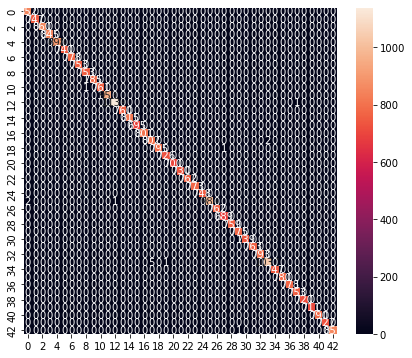

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       747
           2       1.00      1.00      1.00       860
           3       1.00      1.00      1.00       845
           4       1.00      1.00      1.00       898
           5       1.00      1.00      1.00       740
           6       1.00      1.00      1.00       778
           7       1.00      1.00      1.00       753
           8       1.00      1.00      1.00       753
           9       1.00      1.00      1.00       786
          10       1.00      1.00      1.00       762
          11       1.00      1.00      1.00       954
          12       1.00      1.00      1.00      1140
          13       1.00      1.00      1.00       760
          14       1.00      1.00      1.00       815
          15       1.00      1.00      1.00       695
          16       1.00      1.00      1.00       801
     

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [61]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [62]:
# Transform model (quantization)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

2023-01-29 14:42:05.940727: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmp4tes_k2h/assets


2023-01-29 14:42:06.308731: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 14:42:06.308952: I tensorflow/core/grappler/devices.cc:69] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2023-01-29 14:42:06.309411: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2023-01-29 14:42:06.309708: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-29 14:42:06.309826: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 14:42:06.310015: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1060 wit

34080

NUMA node, so returning NUMA node zero
2023-01-29 14:42:06.370388: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 14:42:06.370552: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1862] Adding visible gpu devices: 0
2023-01-29 14:42:06.370573: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1261] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-01-29 14:42:06.370578: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1267]      0 
2023-01-29 14:42:06.370582: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1280] 0:   N 
2023-01-29 14:42:06.370656: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 14:42:06.370879: I tensorflow/stream_executor/cuda/cuda_gpu_

# Inference test

In [63]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [64]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [65]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [66]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 577 µs, sys: 50 µs, total: 627 µs
Wall time: 593 µs


In [67]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.0000000e+00 1.3297298e-32 9.0895689e-28 1.1146304e-25 1.2764908e-28
 4.2781236e-29 7.8318082e-37 5.3732734e-32 9.9944640e-17 2.9762551e-26
 2.2852813e-21 1.1177375e-27 1.4249403e-22 2.4863596e-23 5.3128988e-18
 0.0000000e+00 0.0000000e+00 3.0610080e-14 1.0717678e-22 9.6352017e-14
 1.0048711e-31 3.7912928e-06 1.5639463e-22 1.4321445e-37 9.9999607e-01
 9.0433417e-25 7.7603693e-23 4.0372332e-18 1.4734991e-26 1.8234296e-23
 5.5260838e-24 5.5152931e-12 4.8814595e-17 2.9420340e-08 6.4133811e-23
 2.3153881e-36 0.0000000e+00 3.8473075e-38 1.4919532e-36 2.8085989e-27
 4.9843224e-13 1.1576102e-07 1.0558999e-23]
24
